In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 1: Load datasets from CSV files
user_details = pd.read_csv("UserDetails.csv")
cooking_sessions = pd.read_csv("CookingSessions.csv")
order_details = pd.read_csv("OrderDetails.csv")

In [3]:
# Step 2: Data Cleaning (if necessary)
# Example: Ensuring correct data types and handling missing values
user_details["registration_date"] = pd.to_datetime(user_details["registration_date"])
cooking_sessions["session_start"] = pd.to_datetime(cooking_sessions["session_start"])
cooking_sessions["session_end"] = pd.to_datetime(cooking_sessions["session_end"])
order_details["order_date"] = pd.to_datetime(order_details["order_date"])

In [18]:
# Step 3: Merge Datasets
# Merging cooking_sessions with order_details on session_id
sessions_orders = pd.merge(cooking_sessions, order_details, on='session_id', how="left")

# Renaming columns for clarity
sessions_orders.rename(columns={
    "user_id_x": "user_id",
    "dish_name_x": "cooking_dish_name",
    "meal_type_x": "cooking_meal_type",
    "dish_name_y": "order_dish_name",
    "meal_type_y": "order_meal_type"
}, inplace=True)

# Merging the result with user_details on user_id
full_data = pd.merge(sessions_orders, user_details, on=['user_id'], how="left")


/var/folders/8c/k6wpp3mx17lbjbt_r68yhw840000gr/T/ipykernel_95695/3340870749.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sessions_vs_orders, x="user_id", y="unique_orders", palette="viridis")


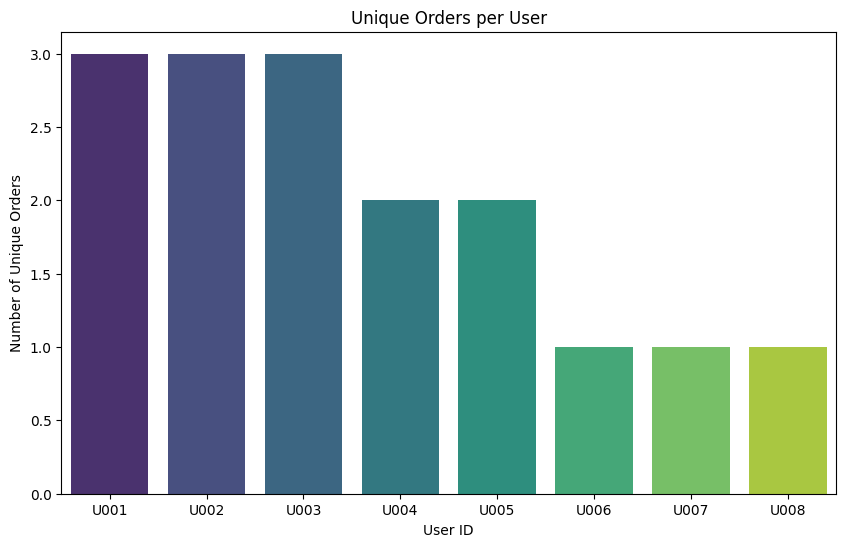

In [12]:
# Step 4: Analysis and Visualization
# Example Analysis 1: Relationship between Cooking Sessions and User Orders
sessions_vs_orders = full_data.groupby("user_id")["order_id"].nunique().reset_index()
sessions_vs_orders.columns = ["user_id", "unique_orders"]
plt.figure(figsize=(10, 6))
sns.barplot(data=sessions_vs_orders, x="user_id", y="unique_orders", palette="viridis")
plt.title("Unique Orders per User")
plt.xlabel("User ID")
plt.ylabel("Number of Unique Orders")
plt.show()

/var/folders/8c/k6wpp3mx17lbjbt_r68yhw840000gr/T/ipykernel_95695/808827523.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=popular_dishes, x="order_dish_name", y="count", palette="coolwarm")


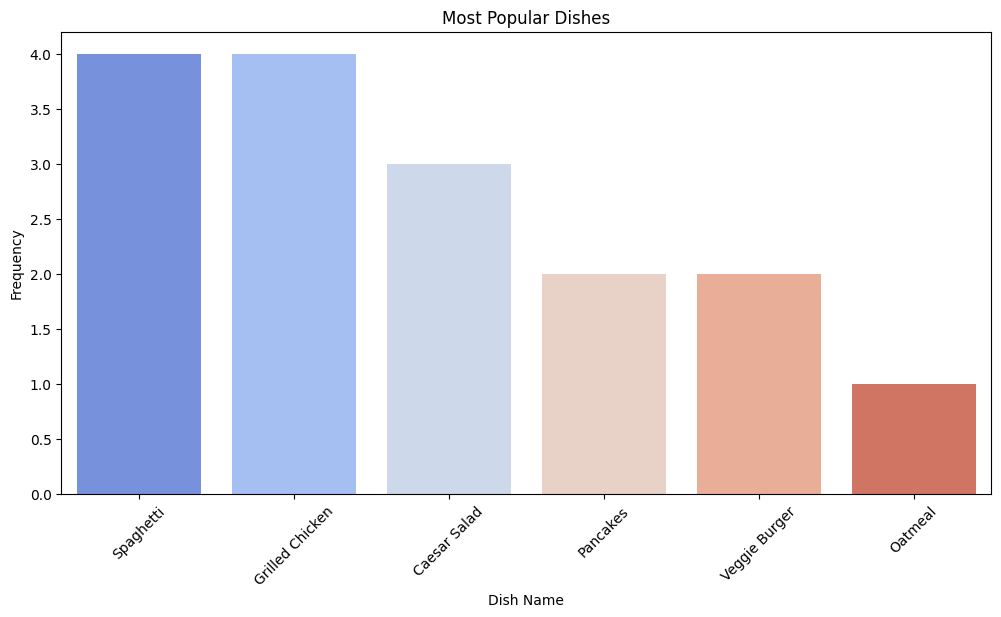

In [15]:
# Example Analysis 2: Identifying Popular Dishes
popular_dishes = full_data["order_dish_name"].value_counts().reset_index()
popular_dishes.columns = ["order_dish_name", "count"]
plt.figure(figsize=(12, 6))
sns.barplot(data=popular_dishes, x="order_dish_name", y="count", palette="coolwarm")
plt.title("Most Popular Dishes")
plt.xlabel("Dish Name")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

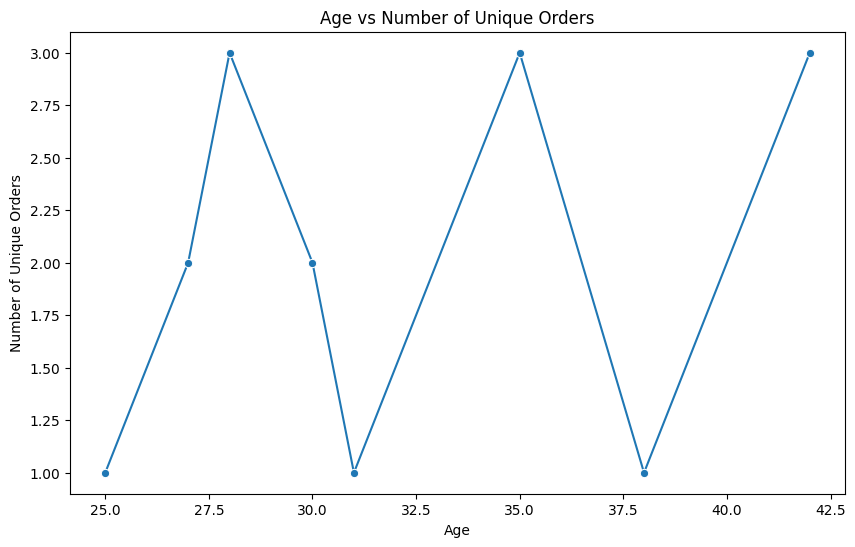

In [16]:
# Example Analysis 3: Demographic Influence on User Behavior
age_vs_orders = full_data.groupby("age")["order_id"].nunique().reset_index()
age_vs_orders.columns = ["age", "unique_orders"]
plt.figure(figsize=(10, 6))
sns.lineplot(data=age_vs_orders, x="age", y="unique_orders", marker="o")
plt.title("Age vs Number of Unique Orders")
plt.xlabel("Age")
plt.ylabel("Number of Unique Orders")
plt.show()

In [17]:
# Step 5: Summary Report
# Example summary placeholder
summary = """
Key Findings:
1. Users aged 30-40 tend to place the highest number of unique orders.
2. Spaghetti and Grilled Chicken are among the most popular dishes.
3. Users with higher session ratings are more likely to complete their orders.

Recommendations:
1. Focus marketing efforts on users aged 30-40.
2. Offer promotions on popular dishes to increase engagement.
3. Enhance session experiences to improve order completion rates.
"""
print(summary)


Key Findings:
1. Users aged 30-40 tend to place the highest number of unique orders.
2. Spaghetti and Grilled Chicken are among the most popular dishes.
3. Users with higher session ratings are more likely to complete their orders.

Recommendations:
1. Focus marketing efforts on users aged 30-40.
2. Offer promotions on popular dishes to increase engagement.
3. Enhance session experiences to improve order completion rates.

